In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_palette('Set2', n_colors=10)

In [2]:
pf = pd.read_csv("pseudo_facebook.tsv", sep='\t', dtype={'userid':'category'})

In [3]:
pf.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


### Third Qualitative variable

In [4]:
d = {'mean':'mean',
     'median':'median',
     'n': 'size'}
pf_by_age_gender = pf.groupby(['age', 'gender'])['friend_count'].agg(d).reset_index()
pf_by_age_gender.head()

,age,gender,n,median,mean
0,13,female,193,148.0,259.160622
1,13,male,291,55.0,102.134021
2,14,female,847,224.0,362.428571
3,14,male,1078,92.5,164.145640
4,15,female,1139,276.0,538.681299


In [5]:
index_male = pf_by_age_gender['gender'] == 'male'
index_female = pf_by_age_gender['gender'] == 'female'

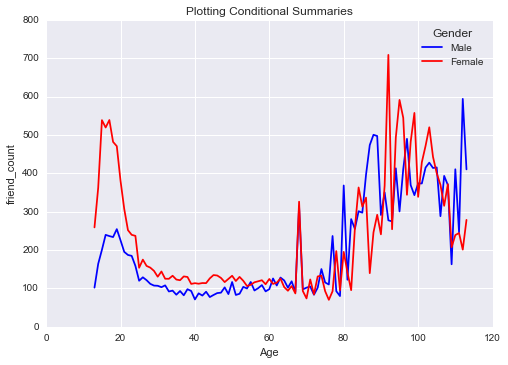

In [6]:
plt.plot(pf_by_age_gender[index_male]['age'], pf_by_age_gender[index_male]['mean'], 'b-', label='Male')
plt.plot(pf_by_age_gender[index_female]['age'], pf_by_age_gender[index_female]['mean'], 'r-', label='Female')
plt.axes().set(xlabel='Age', ylabel='friend_count', title='Plotting Conditional Summaries')
plt.legend(title='Gender')

### Reshape

http://pandas.pydata.org/pandas-docs/stable/reshaping.html#pivot-tables-and-cross-tabulations

In [7]:
pf_by_age_gender.head()

,age,gender,n,median,mean
0,13,female,193,148.0,259.160622
1,13,male,291,55.0,102.134021
2,14,female,847,224.0,362.428571
3,14,male,1078,92.5,164.145640
4,15,female,1139,276.0,538.681299


In [8]:
res = pf_by_age_gender.pivot(index='age', columns='gender', values='mean').reset_index()
res['ratio'] = res['female'] / res['male']
res.head()

gender,age,female,male,ratio
0,13,259.160622,102.134021,2.537456
1,14,362.428571,164.145640,2.207970
2,15,538.681299,200.665765,2.684470
3,16,519.514540,239.674784,2.167581
4,17,538.994337,236.492421,2.279119


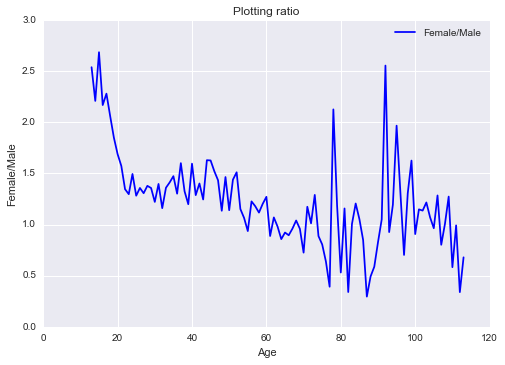

In [9]:
plt.plot(res['age'], res['ratio'], 'b-', label='Female/Male')
plt.axes().set(xlabel='Age', ylabel='Female/Male', title='Plotting ratio')
plt.legend()

#### Third Quantitative variable

In [10]:
pf['year_joined'] = pd.Series(np.floor(2014 - pf['tenure']/365))#.fillna(0).astype(int)
pf['year_joined'].head()

0    2013.0
1    2013.0
2    2013.0
3    2013.0
4    2013.0
Name: year_joined, dtype: float64

In [11]:
pf['year_joined'].describe()

count    99001.000000
mean      2012.002172
std          1.255897
min       2005.000000
25%       2012.000000
50%       2012.000000
75%       2013.000000
max       2014.000000
Name: year_joined, dtype: float64

In [12]:
pf['year_joined'].value_counts().sort_index()

2005.0        9
2006.0       15
2007.0      581
2008.0     1507
2009.0     4557
2010.0     5448
2011.0     9860
2012.0    33366
2013.0    43588
2014.0       70
Name: year_joined, dtype: int64

### Cut a variable

In [13]:
pf['year_joined.bucket'] = pd.cut(pf['year_joined'], bins=[2004, 2009, 2011, 2012, 2014])
pf['year_joined.bucket'].value_counts().sort_index()

(2004, 2009]     6669
(2009, 2011]    15308
(2011, 2012]    33366
(2012, 2014]    43658
Name: year_joined.bucket, dtype: int64

In [14]:
res = pf.groupby(['age', 'year_joined.bucket'])['friend_count'].mean().reset_index()
res.head()

,age,year_joined.bucket,friend_count
0,13,"(2009, 2011]",469.818182
1,13,"(2011, 2012]",352.333333
2,13,"(2012, 2014]",135.668235
3,14,"(2009, 2011]",860.928571
4,14,"(2011, 2012]",350.812918


In [15]:
res_grandmean = res.groupby('age')['friend_count'].mean().reset_index()
res_grandmean.head()

,age,friend_count
0,13,319.273250
1,14,473.505220
2,15,824.823441
3,16,585.099022
4,17,694.779425


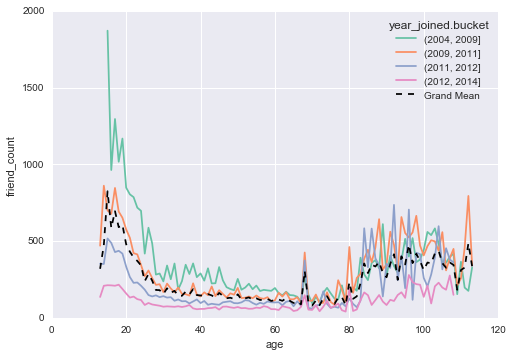

In [16]:
buckets = res['year_joined.bucket'].unique().sort_values()
for bucket in buckets:
    plt.plot(res[res['year_joined.bucket']==bucket]['age'], res[res['year_joined.bucket']==bucket]['friend_count'], label=bucket)
plt.plot(res_grandmean['age'], res_grandmean['friend_count'], 'k--', label='Grand Mean')    
plt.axes().set(xlabel='age', ylabel='friend_count')
plt.legend(title='year_joined.bucket')    

### Frending rate

In [17]:
index = pf['tenure']>0

In [18]:
(pf[index]['friend_count'] / pf[index]['tenure']).describe()

count    98931.000000
mean         0.609609
std          2.557356
min          0.000000
25%          0.077486
50%          0.220486
75%          0.565802
max        417.000000
dtype: float64

### Friendships initiated

In [19]:
index = pf['tenure']>0

In [20]:
res = pf[index].groupby(['tenure', 'year_joined.bucket'])['friendships_initiated'].mean().reset_index()
res['ratio'] = res['friendships_initiated'] / res['tenure']
res.head()

,tenure,year_joined.bucket,friendships_initiated,ratio
0,1.0,"(2012, 2014]",4.233333,4.233333
1,2.0,"(2012, 2014]",19.097222,9.548611
2,3.0,"(2012, 2014]",11.898734,3.966245
3,4.0,"(2012, 2014]",13.069767,3.267442
4,5.0,"(2012, 2014]",20.163043,4.032609


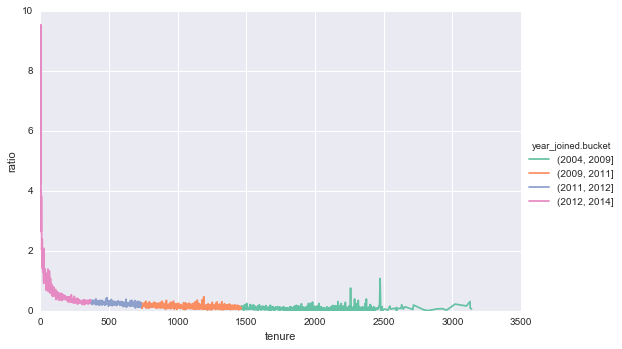

In [21]:
g = sns.FacetGrid(res, hue='year_joined.bucket', size=5, aspect=1.5)
g.map(plt.plot, 'tenure', 'ratio', alpha=1)
g.add_legend()

Conclusion: people with higher tenure typically initiate less friendships

### Yogurt Dataset

http://pandas.pydata.org/pandas-docs/version/0.18.1/comparison_with_r.html

In [22]:
yo = pd.read_csv('yogurt.csv')   #, dtype={'id':'category'}
yo.head()

,obs,id,time,strawberry,blueberry,pina.colada,plain,mixed.berry,price
0,1,2100081,9678,0,0,0,0,1,58.96
1,2,2100081,9697,0,0,0,0,1,58.96
2,3,2100081,9825,0,0,0,0,1,65.04
3,4,2100081,9999,0,0,0,0,1,65.04
4,5,2100081,10015,1,0,1,0,1,48.96


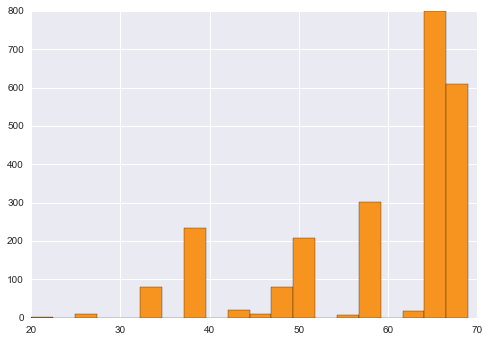

In [23]:
yo['price'].hist(bins=len(yo['price'].unique()), color='#F79420')

In [24]:
yo['price'].describe()

count    2380.000000
mean       59.250891
std        10.913256
min        20.000000
25%        50.000000
50%        65.040000
75%        68.960000
max        68.960000
Name: price, dtype: float64

In [25]:
yo['price'].value_counts().sort_index()

20.00      2
24.96     11
33.04     54
33.20      1
33.28      1
33.36     22
33.52      1
39.04    234
44.00     21
45.04     11
48.96     81
49.52      1
49.60      1
50.00    205
55.04      6
58.96    303
62.00     15
63.04      2
65.04    799
68.96    609
Name: price, dtype: int64

In [26]:
yo['all.purchases'] = yo['strawberry'] + yo['blueberry'] + yo['pina.colada'] + yo['plain'] + yo['mixed.berry']

In [27]:
yo['all.purchases'].describe()

count    2380.000000
mean        1.971008
std         1.425021
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        21.000000
Name: all.purchases, dtype: float64

In [28]:
len(yo['all.purchases'].unique())

13

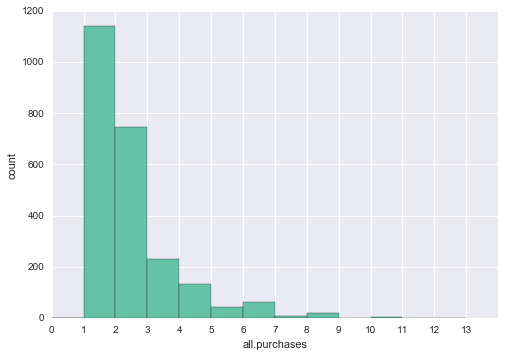

In [29]:
ax = yo['all.purchases'].hist(bins=range(0,14, 1))
ax = ax.set(xticks=range(0,14, 1), xlabel='all.purchases', ylabel='count')

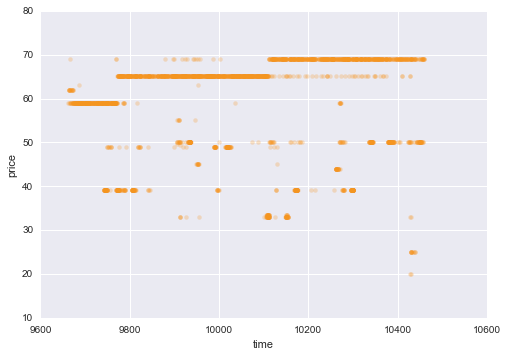

In [30]:
ax = sns.regplot(x='time', y='price', data=yo, fit_reg=False, scatter_kws={'alpha':0.25, 'color':'#F79520'})

Conclusion: price of yogurts seems to be increasing with time, sometimes buyers use coupons

### Sampling observations

In [31]:
sample_ids = pd.DataFrame({'id':pd.Series(yo['id'].astype(int).unique()).sample(n=16, random_state = 4230)})  
sample_ids

,id
228,2139162
314,2164863
16,2103218
12,2102095
124,2122838
268,2149500
222,2136960
203,2133496
225,2137687
174,2129098


In [32]:
sample = yo.merge(sample_ids, on='id')
sample.head()

,obs,id,time,strawberry,blueberry,pina.colada,plain,mixed.berry,price,all.purchases
0,150,2102095,9816,0,0,1,0,0,65.04,1
1,151,2102095,10169,0,1,1,0,0,68.96,2
2,152,2102095,10428,0,0,0,0,1,65.04,1
3,177,2103218,10162,0,0,0,1,0,68.96,1
4,178,2103218,10349,0,0,0,1,0,68.96,1


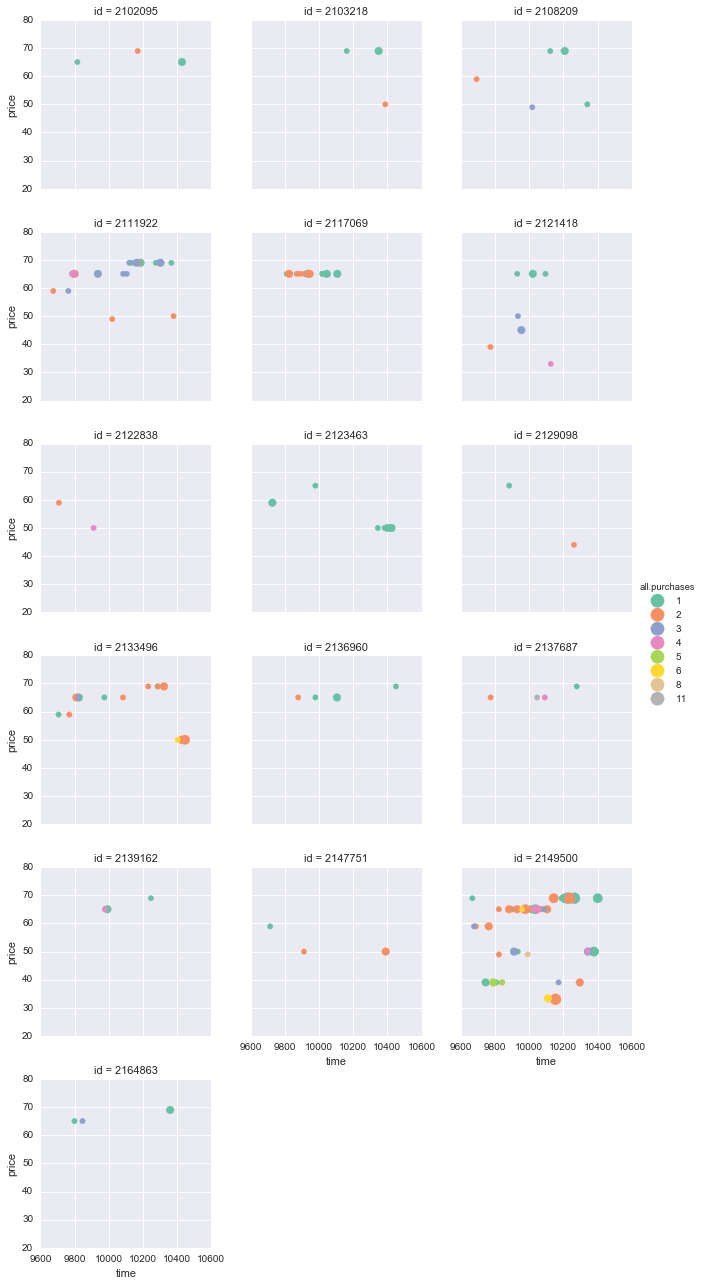

In [33]:
g = sns.FacetGrid(sample, col='id', hue='all.purchases', col_wrap=3, margin_titles=True)
g.map(plt.scatter, 'time', 'price', s=sample['all.purchases']*30)
g.add_legend()    

### Scatterplot Matrices

In [34]:
sample['id'] = sample['id'].astype('category')

In [35]:
sample.columns

Index([u'obs', u'id', u'time', u'strawberry', u'blueberry', u'pina.colada',
       u'plain', u'mixed.berry', u'price', u'all.purchases'],
      dtype='object')

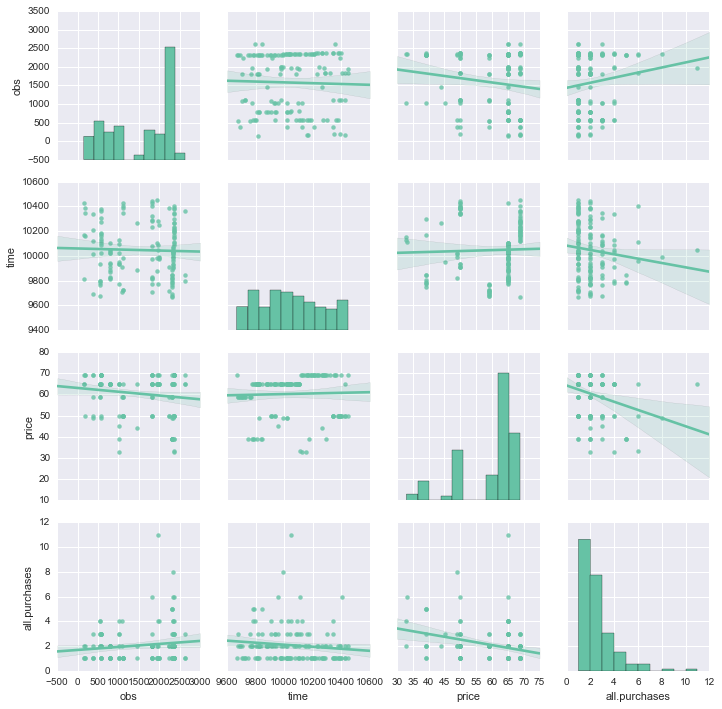

In [36]:
sns.pairplot(data=sample, vars=[u'obs', u'time', u'price', u'all.purchases'], kind='reg')

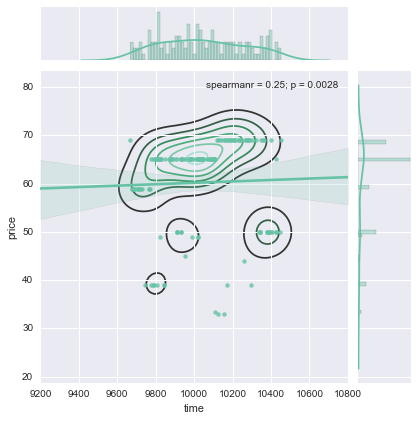

In [37]:
from scipy.stats import spearmanr
sns.jointplot(x='time', y='price', data=sample, kind='reg', stat_func=spearmanr, marginal_kws=dict(bins=50, rug=False))\
   .plot_joint(sns.kdeplot, zorder=0, n_levels=6)

### Heat maps

In [38]:
nci = pd.read_table('nci.tsv', sep='\s+', header=None)
nci.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.300,0.679961,0.940,0.280,0.485,0.310,-0.830,-0.190,0.460,0.760,...,0.010,-0.620,-0.380,0.049980,0.650,-0.030,-0.270,0.210,-0.050,0.350
1,1.180,1.289961,-0.040,-0.310,-0.465,-0.030,0.000,-0.870,0.000,1.490,...,-1.280,-0.130,0.000,-0.720019,0.640,-0.480,0.630,-0.620,0.140,-0.270
2,0.550,0.169961,-0.170,0.680,0.395,-0.100,0.130,-0.450,1.150,0.280,...,-0.770,0.200,-0.060,0.419981,0.150,0.070,-0.100,-0.150,-0.090,0.020
3,1.140,0.379961,-0.040,-0.810,0.905,-0.460,-1.630,0.080,-1.400,0.100,...,0.940,-1.410,0.800,0.929980,-1.970,-0.700,1.100,-1.330,-1.260,-1.230
4,-0.265,0.464961,-0.605,0.625,0.200,-0.205,0.075,0.005,-0.005,-0.525,...,-0.015,1.585,-0.115,-0.095020,-0.065,-0.195,1.045,0.045,0.045,-0.715


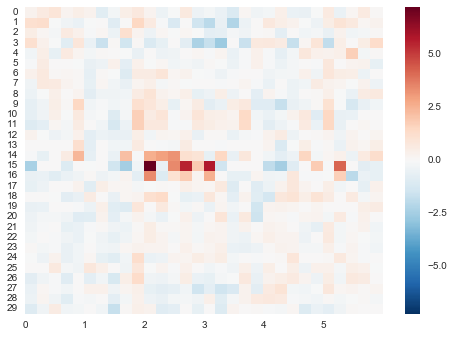

In [39]:
ax = sns.heatmap(nci[range(0,30)].head(30))
ax = ax.set(xticks=range(0,30,5))